### Lab №05

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import random
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
name = 'stl10'

In [3]:
df_train = tfds.as_dataframe(tfds.load(name, split='train[:20%]'))
df_test = tfds.as_dataframe(tfds.load(name, split='train[20%:30%]'))
df_train.shape, df_test.shape

((1000, 2), (500, 2))

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [4]:
def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    num_row = 2
    num_col = 5 
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    for i in range(num_row * num_col):
        img = imgs[i] 
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

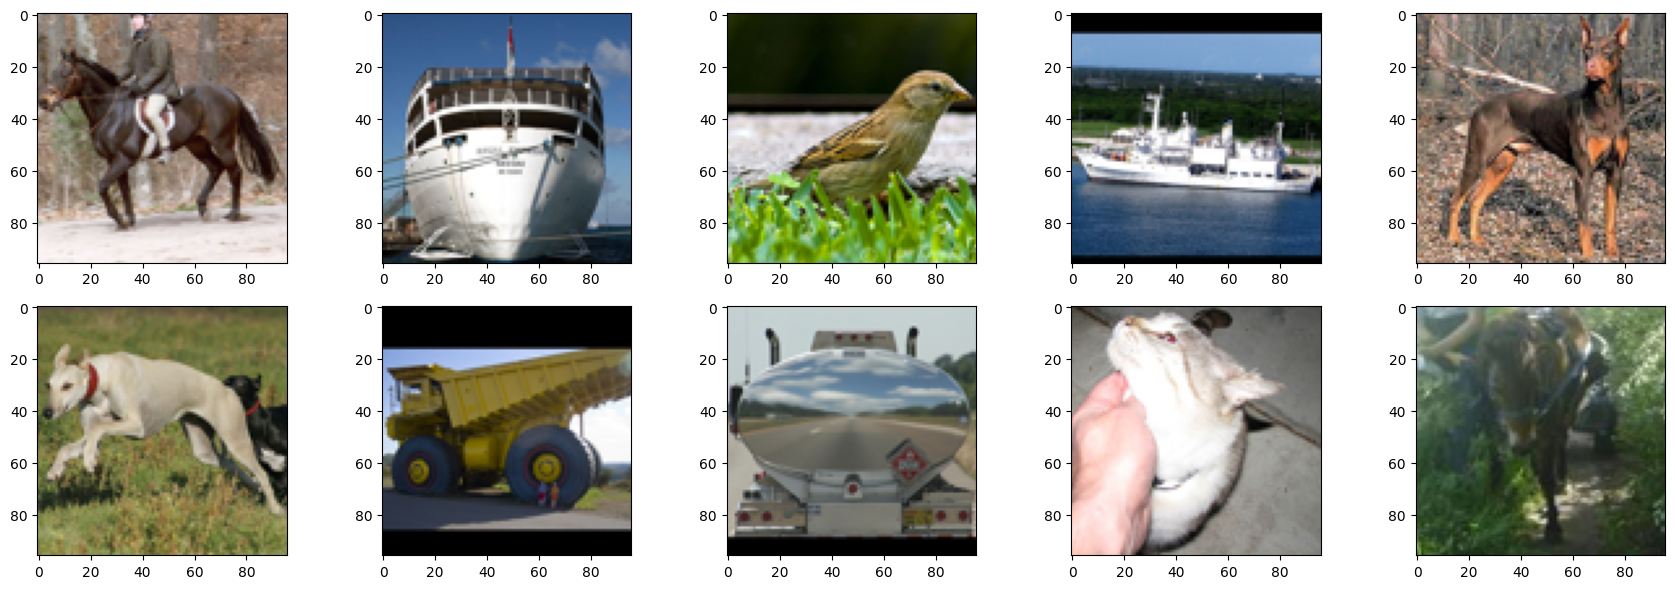

In [5]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)

n = df_train.iloc[0]['image'].shape[0]

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))
train_images.shape, test_images.shape
train_images /= 255
test_images  /= 255
plot_random_sample(test_images)

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании). Отследите обучение нейронных сетей и укажите, на сколько процентов снизились в результате обучения потери по отношению к потерям на первой эпохе обучения. Оцените результаты обучения нейронных сетей (варианты: нейронная сеть обучилась, недообучилась, переобучилась).   

In [6]:
df_train['label'].value_counts()

label
8    117
3    114
4    105
2    102
6    101
9    100
7     99
0     95
5     89
1     78
Name: count, dtype: int64

In [7]:
a = 6
b = 7
c = 8
epoch = 10

In [8]:
df_test1 = []
for i in df_test.values:
    if i[1] in (a,b):
        df_test1.append(i)

df_test = pd.DataFrame(df_test1)
df_test[1].value_counts()

df_train1 = []
for i in df_train.values:
    if i[1] in (a,b):
        df_train1.append(i)


df_train = pd.DataFrame(df_train1)
train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

train_labels = pd.Series(train_labels).apply(lambda x:1 if x==b else 0).values
test_labels = pd.Series(test_labels).apply(lambda x:1 if x==b else 0).values
print(np.unique(train_labels))

train_images /= 255
test_images  /= 255
tf.random.set_seed(42)

[0 1]


In [9]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n, n, 3)),
    tf.keras.layers.Flatten()
])

for i in range(4):
    if i % 2 == 0:
        model_1.add(tf.keras.layers.Dense(80, activation='selu'))
    else:
        model_1.add(tf.keras.layers.Dense(60, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))

model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=epoch,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.4358 - loss: 15.5760 - val_accuracy: 0.6000 - val_loss: 14.4960
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4536 - loss: 14.8644 - val_accuracy: 0.5529 - val_loss: 14.8527
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4477 - loss: 15.5116 - val_accuracy: 0.5529 - val_loss: 14.3273
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4477 - loss: 14.5501 - val_accuracy: 0.5529 - val_loss: 14.2936
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4477 - loss: 14.4697 - val_accuracy: 0.5529 - val_loss: 14.0776
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4477 - loss: 14.1679 - val_accuracy: 0.5529 - val_loss: 13.9397
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4477 - loss: 14.0025 - val_accuracy: 0.5529 - val_loss: 13.8238
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4477 - loss: 13.8718 - val_accuracy: 0.5412 - v

In [10]:
loss_reduction_1 = (history_1.history['val_loss'][0] - history_1.history['val_loss'][-1]) / history_1.history['val_loss'][0] * 100

print("Уменьшение потерь для model_1: {:.2f}%".format(loss_reduction_1))

Уменьшение потерь для model_1: 6.85%


In [11]:
def evaluate_training(loss_reduction):
    if loss_reduction > 50:
        return "Нейронная сеть обучилась"
    elif loss_reduction > 0:
        return "Недообучилась"
    else:
        return "Переобучилась"

result = evaluate_training(loss_reduction_1)
result

'Недообучилась'

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), input_shape=(n, n, 3), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history_2 = model_2.fit(train_images,
                        train_labels,
                        epochs=epoch,
                        batch_size=128,
                        validation_data=(test_images, test_labels))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.4774 - loss: 1.0803 - val_accuracy: 0.6118 - val_loss: 0.6751
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5523 - loss: 0.7634 - val_accuracy: 0.3765 - val_loss: 0.7261
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4870 - loss: 0.8815 - val_accuracy: 0.4353 - val_loss: 1.6298
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5216 - loss: 0.8086 - val_accuracy: 0.4353 - val_loss: 1.2537
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5694 - loss: 0.6773 - val_accuracy: 0.4706 - val_loss: 0.7568
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4910 - loss: 0.8513 - val_accuracy: 0.4353 - val_loss: 1.0277
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5059 - loss: 0.6988 - val_accuracy: 0.4353 - val_loss: 1.2941
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5924 - loss: 0.6910 - val_accuracy: 0.4353 - val_loss:

In [13]:
loss_reduction_2 = (history_2.history['val_loss'][0] - history_2.history['val_loss'][-1]) / history_2.history['val_loss'][0] * 100

print("Уменьшение потерь для model_2: {:.2f}%".format(loss_reduction_2))

Уменьшение потерь для model_2: -5.04%


In [14]:
result = evaluate_training(loss_reduction_2)
result

'Переобучилась'

4. Постройте кривые обучения нейронных сетей бинарной классификации для показателей потерь и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

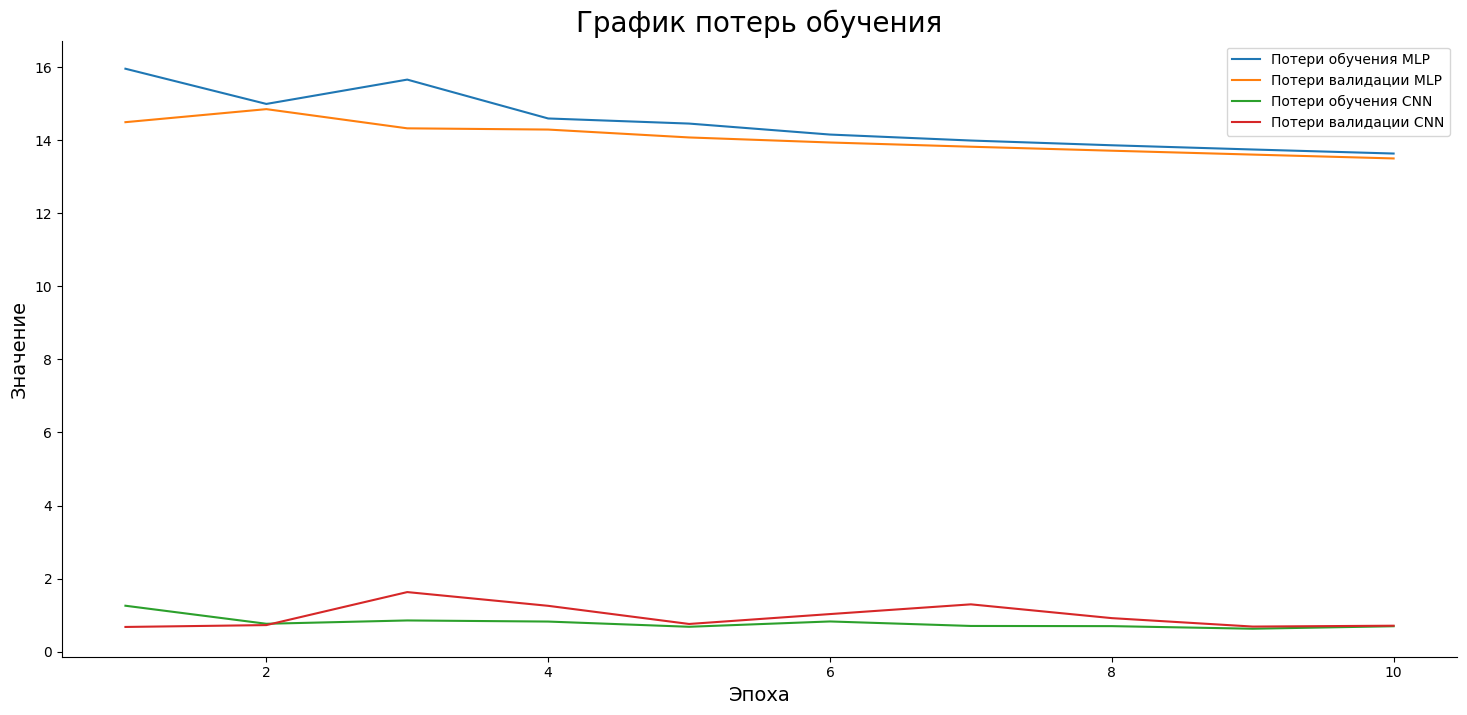

In [15]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epoch+1), history_1.history['loss'], label='Потери обучения MLP')
plt.plot(np.arange(1, epoch+1), history_1.history['val_loss'], label='Потери валидации MLP')
plt.plot(np.arange(1, epoch+1), history_2.history['loss'], label='Потери обучения CNN')
plt.plot(np.arange(1, epoch+1), history_2.history['val_loss'], label='Потери валидации CNN')

plt.title('График потерь обучения', size=20)
plt.xlabel('Эпоха', size=14)
plt.ylabel('Значение', size=14)

plt.legend()

plt.show()

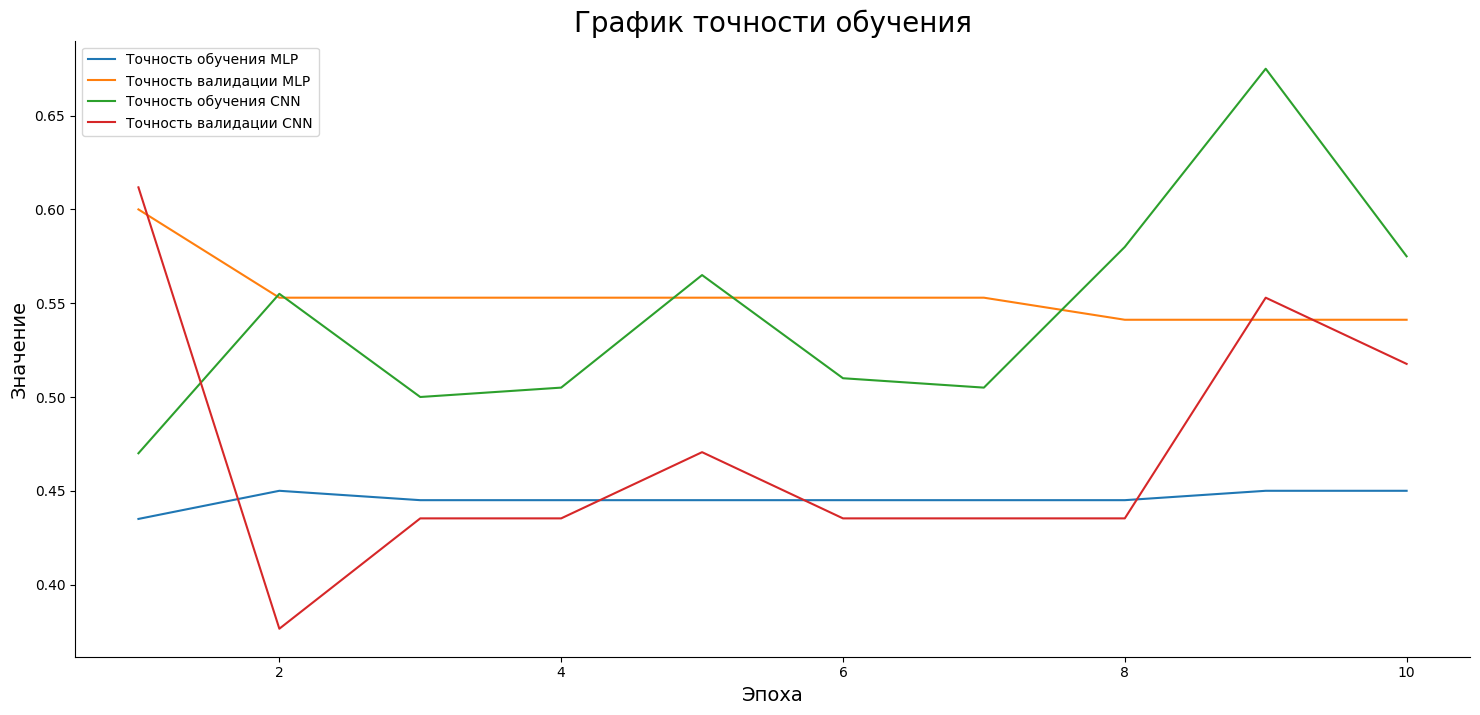

In [16]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epoch+1), history_1.history['accuracy'], label='Точность обучения MLP')
plt.plot(np.arange(1, epoch+1), history_1.history['val_accuracy'], label='Точность валидации MLP')
plt.plot(np.arange(1, epoch+1), history_2.history['accuracy'], label='Точность обучения CNN')
plt.plot(np.arange(1, epoch+1), history_2.history['val_accuracy'], label='Точность валидации CNN')

plt.title('График точности обучения', size=20)
plt.xlabel('Эпоха', size=14)
plt.ylabel('Значение', size=14)

plt.legend()

plt.show()

5. Сравните качество бинарной классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [17]:
predictions_1 = model_1.predict(test_images)
predictions_1 = (predictions_1 > 0.5).astype(int)

TP_1 = np.sum((predictions_1 == 1) & (test_labels == 1))
TN_1 = np.sum((predictions_1 == 0) & (test_labels == 0))
FP_1 = np.sum((predictions_1 == 1) & (test_labels == 0))
FN_1 = np.sum((predictions_1 == 0) & (test_labels == 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [18]:
predictions_2 = model_2.predict(test_images)
predictions_2 = (predictions_2 > 0.5).astype(int)

TP_2 = np.sum((predictions_2 == 1) & (test_labels == 1))
TN_2 = np.sum((predictions_2 == 0) & (test_labels == 0))
FP_2 = np.sum((predictions_2 == 1) & (test_labels == 0))
FN_2 = np.sum((predictions_2 == 0) & (test_labels == 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [19]:
rand_index_1 = (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)
print("Индекс Rand для model_1:", rand_index_1)

rand_index_2 = (TP_2 + TN_2) / (TP_2 + TN_2 + FP_2 + FN_2)
print("Индекс Rand для model_2:", rand_index_2)

Индекс Rand для model_1: 0.5616608996539793
Индекс Rand для model_2: 0.4489965397923875


6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


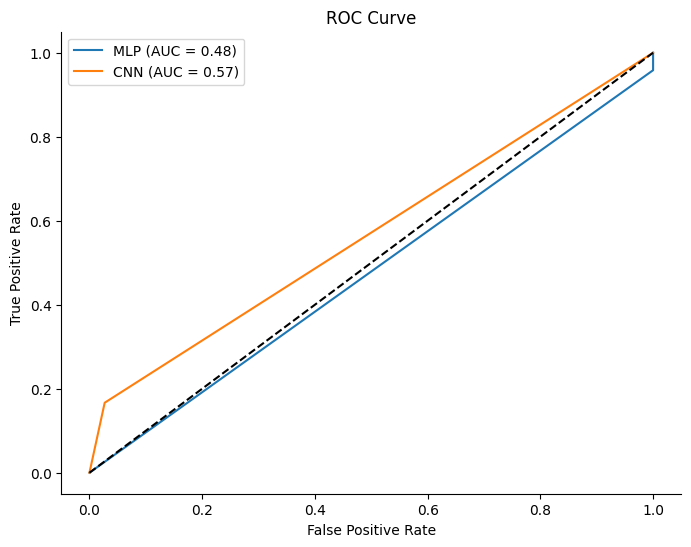

AUC - MLP: 0.4791666666666667
AUC - CNN: 0.5698198198198199


In [20]:
mlp_predictions = model_1.predict(test_images)
mlp_predictions = np.round(mlp_predictions).flatten()

cnn_predictions = model_2.predict(test_images)
cnn_predictions = np.round(cnn_predictions).flatten()

mlp_fpr, mlp_tpr, _ = roc_curve(test_labels, mlp_predictions)
mlp_roc_auc = roc_auc_score(test_labels, mlp_predictions)

cnn_fpr, cnn_tpr, _ = roc_curve(test_labels, cnn_predictions)
cnn_roc_auc = roc_auc_score(test_labels, cnn_predictions)

plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP (AUC = {:.2f})'.format(mlp_roc_auc))
plt.plot(cnn_fpr, cnn_tpr, label='CNN (AUC = {:.2f})'.format(cnn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC - MLP:', mlp_roc_auc)
print('AUC - CNN:', cnn_roc_auc)

7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании).

In [21]:
df_train = tfds.as_dataframe(tfds.load(name, split='train[:20%]'))
df_test = tfds.as_dataframe(tfds.load(name, split='train[20%:30%]'))
df_train.shape, df_test.shape

((1000, 2), (500, 2))

In [22]:
df_train1 = []
for i in df_train.values:
    if i[1] in (a,b,c):
        df_train1.append(i)
df_train = pd.DataFrame(df_train1)
df_test1 = []

for i in df_test.values:
    if i[1] in (a,b,c):
        df_test1.append(i)   
df_test = pd.DataFrame(df_test1)

train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

train_labels = np.array([i % len(set(train_labels)) for i, _ in enumerate(train_labels)])
test_labels = np.array([i % len(set(test_labels)) for i, _ in enumerate(test_labels)])
print(np.unique(train_labels))

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],n,n,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],n,n,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

train_images /= 255
test_images  /= 255

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=3)

[0 1 2]


In [24]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n, n, 3)),
    tf.keras.layers.Flatten()
])

for i in range(4):
    if i % 2 == 0:
        model_1.add(tf.keras.layers.Dense(80, activation='selu'))
    else:
        model_1.add(tf.keras.layers.Dense(60, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))

model_1.add(tf.keras.layers.Dense(3, activation='sigmoid'))

model_1.compile(
loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
metrics=['accuracy']
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=epoch,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.3460 - loss: 17.3809 - val_accuracy: 0.3284 - val_loss: 17.5480
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3280 - loss: 16.4522 - val_accuracy: 0.3433 - val_loss: 16.0823
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3367 - loss: 15.9407 - val_accuracy: 0.3358 - val_loss: 15.2514
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2917 - loss: 15.1477 - val_accuracy: 0.3358 - val_loss: 14.3440
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3295 - loss: 14.3538 - val_accuracy: 0.3881 - val_loss: 14.1253
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3259 - loss: 14.0973 - val_accuracy: 0.3358 - val_loss: 14.0355
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3156 - loss: 14.0011 - val_accuracy: 0.3507 - val_loss: 13.8535
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3124 - loss: 13.8146 - val_accuracy: 0.3507 - v

In [25]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), input_shape=(n, n, 3), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), activation='elu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
metrics=['accuracy'])
history_2 = model_2.fit(train_images,
                        train_labels,
                        epochs=epoch,
                        batch_size=128,
                        validation_data=(test_images, test_labels))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.3334 - loss: 1.6919 - val_accuracy: 0.3433 - val_loss: 1.3509
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2878 - loss: 1.4635 - val_accuracy: 0.3358 - val_loss: 1.2724
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3850 - loss: 1.1470 - val_accuracy: 0.3433 - val_loss: 1.1212
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3337 - loss: 1.1702 - val_accuracy: 0.3060 - val_loss: 1.1245
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3181 - loss: 1.1703 - val_accuracy: 0.3209 - val_loss: 1.1302
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3503 - loss: 1.1126 - val_accuracy: 0.3358 - val_loss: 1.1368
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3717 - loss: 1.1100 - val_accuracy: 0.3209 - val_loss: 1.1154
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4309 - loss: 1.0725 - val_accuracy: 0.3284 - val_loss:

8. Сравните качество многоклассовой классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [26]:
predictions_1 = model_1.predict(test_images).argmax(axis=1)

predictions_2 = model_2.predict(test_images).argmax(axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FFDDD75E10> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [27]:
from sklearn.metrics import recall_score

recall_1 = recall_score(test_labels.argmax(axis=1), predictions_1, average=None)
recall_2 = recall_score(test_labels.argmax(axis=1), predictions_2, average=None)

average_recall_1 = np.mean(recall_1)
average_recall_2 = np.mean(recall_2)

print("Средняя полнота классов для model_1:", average_recall_1)
print("Средняя полнота классов для model_2:", average_recall_2)

Средняя полнота классов для model_1: 0.34814814814814815
Средняя полнота классов для model_2: 0.32407407407407407


9. Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

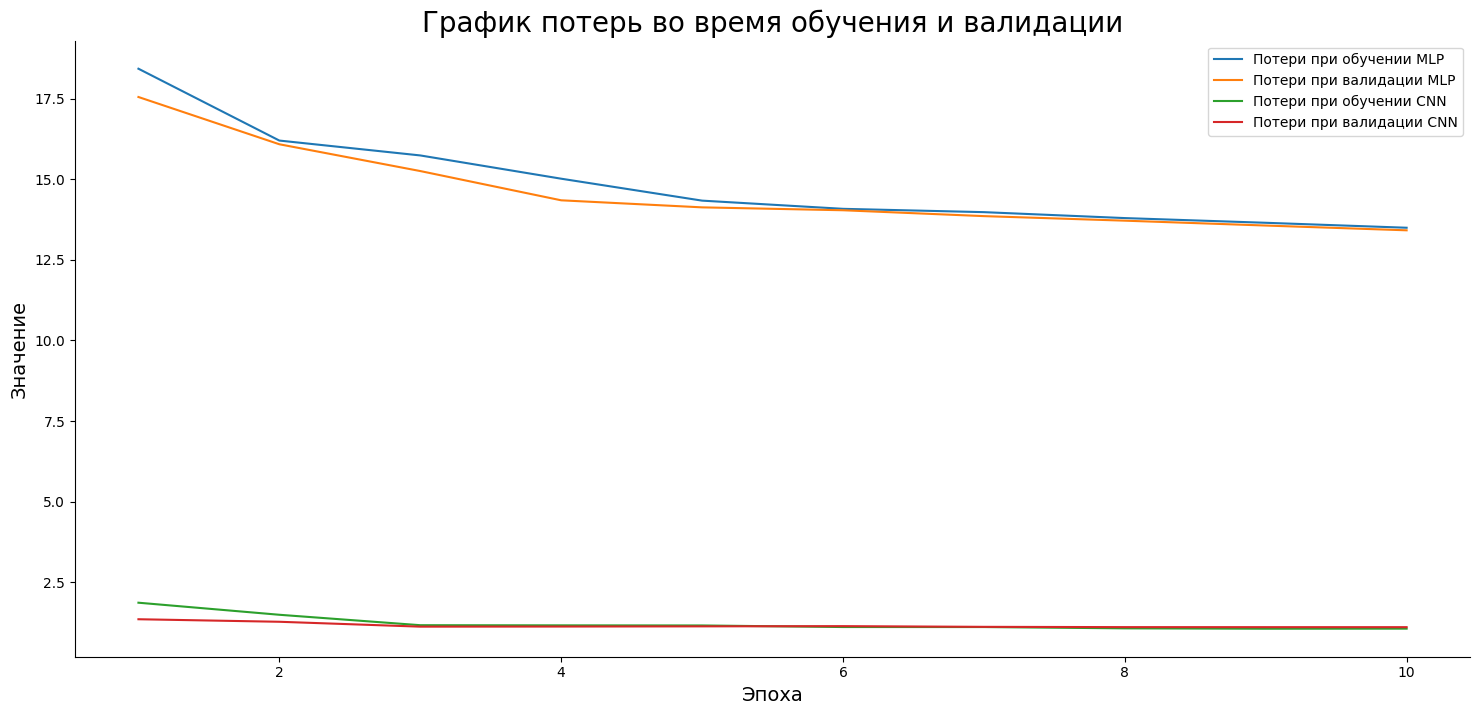

In [28]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epoch+1), history_1.history['loss'], label='Потери при обучении MLP')
plt.plot(np.arange(1, epoch+1), history_1.history['val_loss'], label='Потери при валидации MLP')
plt.plot(np.arange(1, epoch+1), history_2.history['loss'], label='Потери при обучении CNN')
plt.plot(np.arange(1, epoch+1), history_2.history['val_loss'], label='Потери при валидации CNN')

plt.title('График потерь во время обучения и валидации', size=20)
plt.xlabel('Эпоха', size=14)
plt.ylabel('Значение', size=14)
plt.legend()

plt.show()

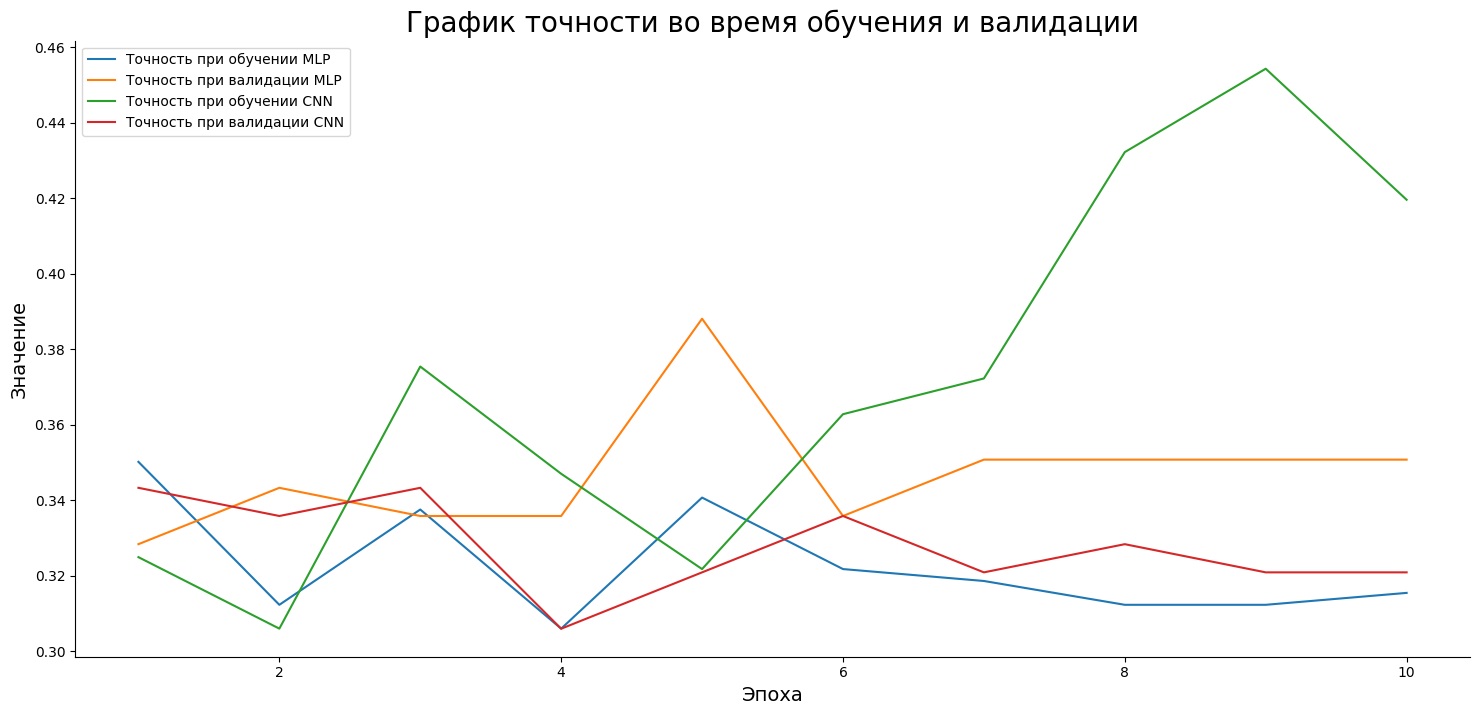

In [29]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epoch+1), history_1.history['accuracy'], label='Точность при обучении MLP')
plt.plot(np.arange(1, epoch+1), history_1.history['val_accuracy'], label='Точность при валидации MLP')
plt.plot(np.arange(1, epoch+1), history_2.history['accuracy'], label='Точность при обучении CNN')
plt.plot(np.arange(1, epoch+1), history_2.history['val_accuracy'], label='Точность при валидации CNN')

plt.title('График точности во время обучения и валидации', size=20)
plt.xlabel('Эпоха', size=14)
plt.ylabel('Значение', size=14)
plt.legend()

plt.show()